![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
display(data)
# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD
399997,24907,2014,66688,NC,Buick,EnclaveLeather
399998,11498,2014,37872,IN,Volkswagen,Jetta


,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [3]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [4]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [6]:
y.describe()

count    10495.000000
mean     14538.403716
std       3922.420961
min       5002.000000
25%      11999.000000
50%      15000.000000
75%      16999.000000
max      32444.000000
Name: Price, dtype: float64

Cantidad total de valores, en este caso, 10495 listados de precios.

El precio medio de los listados es de $14538

La desviación estándar de los precios es de $3922, lo que indica cuánto varían los precios en relación con el promedio.
El precio más bajo de un listado es de 5002

El 25 por ciento de los listados tienen un precio de $11999 o menos.

La mediana del precio es de $15000, lo que significa que la mitad de los vehiculos son más baratos que esto y la otra mitad más caros.

El 75 por ciento de los vehiculos tienen un precio de $16999 o menos.

El precio más alto en los listados es de $32444.

In [7]:
X.describe()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
count,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000
mean,2013.553883,52509.430395,0.056313,0.158456,0.012292,0.048213,0.236494,0.376370,0.111863
std,3.116585,36791.736601,0.230535,0.365186,0.110189,0.214227,0.424949,0.484498,0.315213
min,1998.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,26461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,41680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,71355.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2018.000000,232658.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El número de observaciones 10,495 observaciones, lo que indica que no hay valores nulos.

El valor medio de las columnas Por ejemplo, el año medio de los vehículos listados es aproximadamente 2013, y el kilometraje medio es de unos 52,509.

La desviación estándar, que mide la cantidad de variación o dispersión de un conjunto de valores. Una desviación estándar baja indica que los valores tienden a estar cerca de la media.

El valor mínimo en cada columna. El año mínimo es 1998, lo que sugiere que el vehículo más antiguo en los datos es de ese año, las millas minimas recorridas son 5.

25%, 50% (median), y 75%: Son los percentiles 25, 50 (mediana), y 75. Por ejemplo, el 25% de los vehículos tienen un año de 2012 o antes, el 50% son de 2014 o antes, y el 75% son de 2016 o antes. Para las millas, el 25% de los vehiculos tienen una cantidad de millas de 26461 o menos, el 50% tiene 41680 o menos, el 75% tiene 71355 o menos.

El valor máximo en cada columna. El año máximo es 2018, indicando que el vehículo más nuevo en los datos es de ese año y la cantida de millas maxima es de 232658

In [5]:
# Celda 4

#modelo sin calibrar

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# crear el modelo Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0)

# entrenar el modelo con los datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred_rf = rf_regressor.predict(X_test)

# calcular MSE, RMSE y MAE
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_rfreg = sqrt(mse_rf)

mae_rfreg  = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error (MAE) with Random Forest: {mae_rfreg}')

print(f'Root Mean Squared Error (RMSE) with Random Forest: {rmse_rfreg}')

r2_rfreg = r2_score(y_test, y_pred_rf)

print(f'R Cuadrado (R2) with Random Forest: {r2_rfreg}')

Mean Absolute Error (MAE) with Random Forest: 1310.1852141275215
Root Mean Squared Error (RMSE) with Random Forest: 1760.9789379390752
R Cuadrado (R2) with Random Forest: 0.7972661307705365


Con las configuraciones de hiperparametros basicos de Random Forest 

El RMSE indica que la prediccion  tiene un error de 1760,9 con respecto al valor real de los autos, lo que puede considerarse un error moderado dependiendo del contexto de negocio.

El RMSE es menor que la desviación estándar ($3922), lo cual es positivo porque indica que el modelo tiene mejor precisión que un modelo simple que siempre predice el promedio.

Dado que el RMSE es mayor que la diferencia entre el primer cuartil (25 por ciento) y la mediana, puede haber una cantidad significativa de errores en las predicciones para vehículos con precios en el rango más bajo.

El MAE de alrededor de 1310 sugiere que, en promedio, las predicciones del modelo tienen un error de $1310 con respecto a los valores reales de los precios de los coches

El modelo puede explicar aproximadamente el 79,72% de la varianza en el conjunto de prueba

### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [6]:
# Celda 5

from sklearn.model_selection import cross_val_score

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 400, 10)

# Definición de lista para almacenar el MSE promedio negativo para cada valor de n_estimators
rmse_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf= RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    mse_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    rmse_scores.append(sqrt(-mse_score))  # Convertimos MSE a RMSE


El mejor n_estimators es: 370


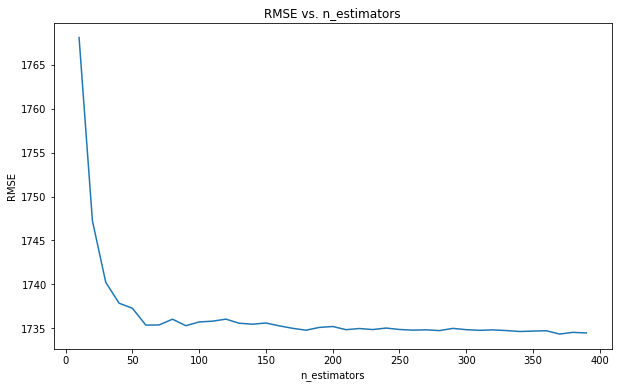

In [7]:


# Identificar el mejor n_estimators
optimal_n_estimators = estimator_range[rmse_scores.index(min(rmse_scores))]
print(f'El mejor n_estimators es: {optimal_n_estimators}')

# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs. n_estimators')
plt.show()


La gráfica muestra cómo varía el Mean Squared Error (RMSE) del modelo a medida que cambia el número de estimadores (árboles) en el Random Forest. 

El gráfico muestra un descenso muy pronunciado del RMSE cuando se aumenta el número de estimadores desde un número bajo (cerca de 10 árboles). Esto indica que agregar más árboles al modelo mejora significativamente su capacidad de predicción al principio.

A medida que el número de estimadores sigue aumentando, la mejora en el RMSE se vuelve menos dramática. Después de un cierto número de árboles, parece que se estabiliza y hay muy poco beneficio en aumentar el número de árboles. aproximadamente después de 180 árboles en este caso, el RMSE se aplana y no hay una mejora significativa al aumentar el número de estimadores, despues de varias pruebas se identifica que n_estimator de 60 es suficiente y subirlo no mejora significativamente pero si aumenta el gasto computacional.

In [8]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
base=int(X_train.shape[1]/3)

feature_range = range(base, X_train.shape[1]+1)


# Definición de lista para almacenar (mse)  para cada valor de max_features
rmse_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestRegressor(n_estimators=60, max_features=feature, random_state=1, n_jobs=-1)
    mse_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    rmse_scores.append(sqrt(-mse_score))  # Convertimos MSE a RMSE





El mejor max_features es: 9


[1762.602670657948,
 1760.346109730342,
 1755.1118423295975,
 1749.0258614966322,
 1746.705147287173,
 1740.3444208945637,
 1735.3489597110297]

Text(0,0.5,'Rmse')

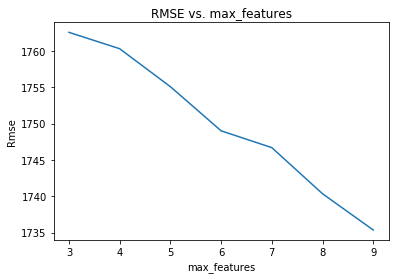

In [9]:
# Identificar el mejor max_depth
optimal_features = feature_range[rmse_scores.index(min(rmse_scores))]
print(f'El mejor max_features es: {optimal_features}')

display(rmse_scores)
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, rmse_scores)
plt.xlabel('max_features')
plt.title('RMSE vs. max_features')
plt.ylabel('Rmse')

In [10]:
import numpy as np
clf = RandomForestRegressor(n_estimators=60, max_features=9, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)
pd.DataFrame({'feature':X_train.columns, 'importance':clf.feature_importances_}).sort_values('importance')



,feature,importance
4,M_CamryBase,0.000448
3,M_Camry4dr,0.001184
5,M_CamryL,0.001251
7,M_CamrySE,0.004501
2,M_Camry,0.007956
6,M_CamryLE,0.008442
8,M_CamryXLE,0.015848
1,Mileage,0.251619
0,Year,0.708753


Basandonos en la gráfica actual, parece que se debe elegir el número más alto de max_features, ya que el RMSE está en su punto más bajo allí, es decir 9 caracteristicas, o para este caso todas las caracteristicas de X_train. Sin embargo, luego de analizar la importancia de cada una se puede evidenciar que cerca del 95 por ciento de aporte lo dan Year y Milieage , por lo cual se prueban las 2 configuraciones y la de 2  incluso da mas bajo, por lo cual se dejara este hiperparametro en este valor dado que será mas optimo para interpretar y ejecutar.

Según las importancias de las características reportadas, el 'Year' (Año) y 'Mileage' (Kilometraje) son, con mucho, las dos características más importantes. Esto tiene sentido intuitivo, ya que el año de fabricación de un coche y su kilometraje son indicadores críticos de su valor y desgaste.

Las diferentes versiones del modelo Camry parecen tener una importancia mucho menor en el modelo. Esto podría indicar que, aunque hay diferencias entre las versiones de Camry, no son tan críticas para predecir el precio como el año y el kilometraje.

El mejor max_depth es: 9


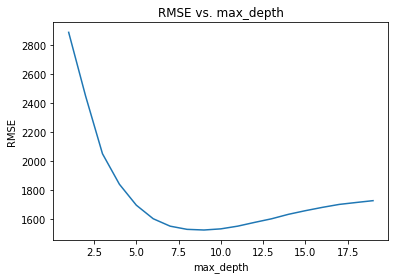

In [11]:
depth_range = range(1, 20)


rmse_scores = []

# uso de fold cross-validation para cada valor de max_depth
for depth in depth_range:
    rf = RandomForestRegressor(n_estimators=60, max_features=2, max_depth=depth, random_state=1, n_jobs=-1)
    mse_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    rmse_scores.append(sqrt(-mse_score))  # Convertimos MSE a RMSE
    
    
# Identificar el mejor max_depth
optimal_depth = depth_range[rmse_scores.index(min(rmse_scores))]
print(f'El mejor max_depth es: {optimal_depth}')

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs. max_depth')
plt.show()

Cuando el max_depth es bajo, hay una disminución rápida y significativa en el RMSE. Esto indica que permitir que los árboles crezcan más allá de un solo nivel (es decir, más allá de simples árboles de decisión) mejora rápidamente la capacidad del modelo para ajustarse a los datos.

A medida que aumenta el max_depth, la reducción en el RMSE se vuelve menos pronunciada. Alrededor de max_depth=5, la disminución en RMSE empieza a aplanarse. Esto sugiere que hacer los árboles más profundos sigue mejorando el modelo, pero el efecto de cada nivel adicional de profundidad es menor.

Punto óptimo del max_depth: Existe un punto,  max_depth=9 en este caso, donde el RMSE parece alcanzar su nivel más bajo antes de que comience a aumentar ligeramente. Este punto podría ser considerado el "óptimo" en términos de balance entre la capacidad predictiva del modelo y la complejidad del mismo.

In [13]:
#modelo Calibrado



# crear el modelo Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=60, max_features=2, max_depth=9, random_state=1, n_jobs=-1)

# entrenar el modelo con los datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred_rf = rf_regressor.predict(X_test)

# calcular MSE, RMSE y MAE
mse_rft = mean_squared_error(y_test, y_pred_rf)
rmse_rfregt = sqrt(mse_rft)

mae_rfregt  = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error (MAE) with Random Forest: {mae_rfregt}')

print(f'Root Mean Squared Error (RMSE) with Random Forest: {rmse_rfregt}')

r2_rfregt = r2_score(y_test, y_pred_rf)

print(f'R Cuadrado (R2) with Random Forest: {r2_rfregt}')

Mean Absolute Error (MAE) with Random Forest: 1139.6867372684897
Root Mean Squared Error (RMSE) with Random Forest: 1552.843967048323
R Cuadrado (R2) with Random Forest: 0.8423573873153947


Conclusiones:

El modelo calibrado ha mejorado en todas las métricas comparado con el modelo no calibrado. El MAE es menor, lo que indica que los errores absolutos promedio de las predicciones son menores. Esto sugiere que las predicciones del modelo calibrado están más cercanas al valor real.

El RMSE también ha disminuido, lo que significa que los errores cuadráticos promedio son menores. Al ser más sensible a los errores grandes que el MAE, una disminución en el RMSE indica que las predicciones del modelo calibrado se ajustan mejor a los datos, especialmente en términos de reducir variaciones grandes.

El valor de R2 ha aumentado de 0.797 a 0.842, lo que es una mejora significativa. Un valor de R2 más alto indica que una mayor proporción de la varianza de la variable dependiente es predecible a partir de las variables independientes. En otras palabras, el modelo calibrado puede explicar aproximadamente el 84.24% de la varianza en el conjunto de prueba, comparado con el 79.73% del modelo no calibrado.

Los ajustes realizados en n_estimators, max_features y max_depth han optimizado el modelo para realizar predicciones más precisas.

### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 6


### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 7


### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
